In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
model = load_model('digit_recognization_model.h5')

## Using model on Test Data

In [3]:
test_data=pd.read_csv('test.csv')

In [4]:
test_data= test_data/255.0
test_pixels = test_data.values.reshape(-1, 28, 28, 1)

In [5]:
predictions = model.predict(test_pixels)
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 3s 3ms/step


In [6]:
results = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

In [7]:
results.to_csv('predictions.csv', index=False)

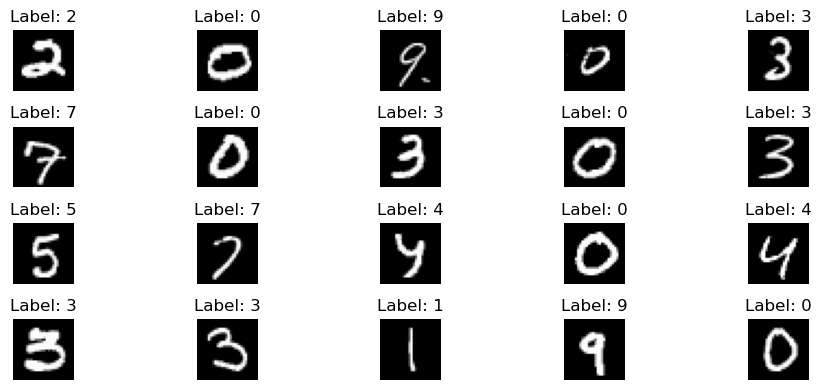

In [8]:
import matplotlib.pyplot as plt

# Reshape the pixel data to match the image dimensions
images = test_pixels.reshape(-1, 28, 28)

# Display the images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {predicted_labels[i]}")

plt.tight_layout()
plt.show()


## Making Single Prediction

In [9]:
from PIL import Image

# Open the grayscale image file
image = Image.open("single_digit.png")  

# Convert the image to grayscale mode
image = image.convert("L")

width, height = image.size

# Resize the image to the desired input size
resized_image = image.resize((28,28))


In [10]:
import numpy as np

# Convert the image to a NumPy array
image_array = np.array(resized_image)

# Normalize the pixel values (if required)
normalized_image = image_array / 255.0

# Reshape the image array if necessary
reshaped_image = normalized_image.reshape((1, 28, 28, 1))


In [11]:
single_prediction = model.predict(reshaped_image)
predicted_label = np.argmax(single_prediction, axis=1)

1/1 [==============================] - 0s 59ms/step


In [12]:
print(predicted_label[0])

5
